In [5]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
from konlpy.tag import Okt
okt = Okt()

In [19]:
df = pd.read_csv('model_df.csv',index_col=0)
df

,6month_return_index,6month_return,6month_log_return,1Year_return_index,1Year_return,1Year_log_return,idx,투자의견,khaiii_tokens
0,-0.033670,0.273438,0.241720,0.294085,0.470703,0.385741,575535,buy,"['슬라이드', '전기전자', '김준환', '년', '월', '일', '반도체', ..."
1,0.230397,0.602326,0.471456,0.451636,0.734884,0.550940,574168,buy,"['삼성', '그', '린뉴딜', '핵심', '기업', '경', '탁', '시장',..."
2,0.230397,0.602326,0.471456,0.451636,0.734884,0.550940,574162,buy,"['년', '월', '일', '기업', '분석', '삼성', '이제', '이익', ..."
3,0.230397,0.602326,0.471456,0.451636,0.734884,0.550940,574149,buy,"['이차', '전지', '투자', '의견', '목표', '주', '원', '현재주가..."
4,0.230397,0.602326,0.471456,0.451636,0.734884,0.550940,574134,buy,"['기업', '분석', '삼성', '분기', '이익', '성장', '본격', '박강..."
...,...,...,...,...,...,...,...,...,...
135730,-0.027726,-0.066964,-0.069312,-0.270470,-0.325893,-0.394366,347333,strongbuy,"['석', '주요', '지표', '단위', '매출액', '원', '영업', '이익'..."
135731,0.057630,0.014013,0.013915,-0.158888,-0.185987,-0.205779,345498,strongbuy,"['사조산업', '재평가', '시기', '사', '조', '그', '룹', '실질'..."
135733,-0.289034,-0.319101,-0.384341,-0.461999,-0.486142,-0.665809,352285,strongbuy,"['기업', '분석', '서', '전기전', '상반기보', '하반기', '기계', ..."
135734,-0.279320,-0.226148,-0.256375,-0.582808,-0.492580,-0.678415,345568,strongbuy,"['기계', '전력', '산업', '송배', '전망', '증설', '성장', '산업..."


In [20]:
df1=df.copy()

### 6Month

In [21]:
a=np.array(df1['6month_return'])

In [22]:
bins = [-1, -0.27, -0.2,-0.15,-0.1,-0.05,0,0.05, 0.1,0.2,0.3,1.5]
bins

[-1, -0.27, -0.2, -0.15, -0.1, -0.05, 0, 0.05, 0.1, 0.2, 0.3, 1.5]

In [23]:
a_cut = pd.cut(a,bins,right=True)
frq = pd.value_counts(a_cut).sort_index()
frq_sum = frq.sum()
df_cut=pd.DataFrame({'도수':frq,
            '상대도수':[i/frq_sum for i in frq],
            '누적도수' : frq.cumsum()})
df_cut

,도수,상대도수,누적도수
"(-1.0, -0.27]",8908,0.086212,8908
"(-0.27, -0.2]",8524,0.082495,17432
"(-0.2, -0.15]",8283,0.080163,25715
"(-0.15, -0.1]",9628,0.093180,35343
"(-0.1, -0.05]",11394,0.110271,46737
"(-0.05, 0.0]",10795,0.104474,57532
"(0.0, 0.05]",9361,0.090596,66893
"(0.05, 0.1]",8137,0.078750,75030
"(0.1, 0.2]",11846,0.114646,86876
"(0.2, 0.3]",7562,0.073185,94438


(array([ 8908.,  8480.,  8314.,  9591., 11422., 10381.,  9783.,  8118.,
        11842.,  7578.,  8910.]),
 array([-1.  , -0.27, -0.2 , -0.15, -0.1 , -0.05,  0.  ,  0.05,  0.1 ,
         0.2 ,  0.3 ,  1.5 ]),
 <BarContainer object of 11 artists>)

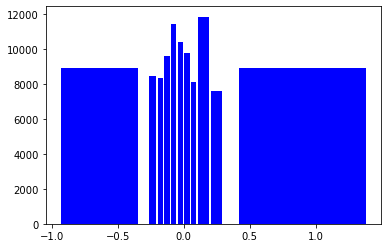

In [24]:
plt.hist(a, bins = bins,rwidth = 0.8,color='blue')

In [25]:
bins_label = [(str(x),alpha) for x,alpha in zip(df_cut.index, ['K','J','I','H','G','F','E','D','C','B','A'])]
bins_label

[('(-1.0, -0.27]', 'K'),
 ('(-0.27, -0.2]', 'J'),
 ('(-0.2, -0.15]', 'I'),
 ('(-0.15, -0.1]', 'H'),
 ('(-0.1, -0.05]', 'G'),
 ('(-0.05, 0.0]', 'F'),
 ('(0.0, 0.05]', 'E'),
 ('(0.05, 0.1]', 'D'),
 ('(0.1, 0.2]', 'C'),
 ('(0.2, 0.3]', 'B'),
 ('(0.3, 1.5]', 'A')]

In [35]:
df2 = df1.copy()
df2["interval"] = pd.cut(df2["6month_return"], bins, right=False, labels=bins_label)
df2['Label'] = df2['interval'].apply(lambda x : x[1])
df2['interval'] = df2['interval'].apply(lambda x : x[0])
df2=df2[['6month_return','interval','Label','khaiii_tokens','idx',]]
df_6month=df2.copy()
df_6month

,6month_return,interval,Label,khaiii_tokens,idx
0,0.273438,"(0.2, 0.3]",B,"['슬라이드', '전기전자', '김준환', '년', '월', '일', '반도체', ...",575535
1,0.602326,"(0.3, 1.5]",A,"['삼성', '그', '린뉴딜', '핵심', '기업', '경', '탁', '시장',...",574168
2,0.602326,"(0.3, 1.5]",A,"['년', '월', '일', '기업', '분석', '삼성', '이제', '이익', ...",574162
3,0.602326,"(0.3, 1.5]",A,"['이차', '전지', '투자', '의견', '목표', '주', '원', '현재주가...",574149
4,0.602326,"(0.3, 1.5]",A,"['기업', '분석', '삼성', '분기', '이익', '성장', '본격', '박강...",574134
...,...,...,...,...,...
135730,-0.066964,"(-0.1, -0.05]",G,"['석', '주요', '지표', '단위', '매출액', '원', '영업', '이익'...",347333
135731,0.014013,"(0.0, 0.05]",E,"['사조산업', '재평가', '시기', '사', '조', '그', '룹', '실질'...",345498
135733,-0.319101,"(-1.0, -0.27]",K,"['기업', '분석', '서', '전기전', '상반기보', '하반기', '기계', ...",352285
135734,-0.226148,"(-0.27, -0.2]",J,"['기계', '전력', '산업', '송배', '전망', '증설', '성장', '산업...",345568


In [36]:
def join_token(token_list):
    string = ' '.join(eval(token_list))
    return string

In [37]:
import time

In [38]:
%%time
df_6month['khaiii_string'] = df_6month['khaiii_tokens'].apply(join_token)

Wall time: 3min 11s


In [39]:
df_6month.to_csv('model_6month.csv')

In [40]:
df = df_6month.copy()

In [41]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [44]:
import re

def han_text_clean(text):
    text = re.sub("[^가-힣ㄱ-ㅎa-zA-Z ]", "", text)
   
    return text

with open('stopwords-ko.txt', 'r', encoding = 'utf-8') as f:
    sw1 = f.read()
    sw1 = re.sub('\\n', ' ', sw1)
    sw1 = sw1.split()

stop_report = '리서치센터  Compliance Notice 본 조사분석자료는 제3자에게 사전 제공된 사실이 없습니다. 당사는 자료작성일 현재 본 조사분석자료에 언급된 종목의 지분을 1% 이상 보유하고 있지 않습니다. \
본 자료를 작성한 애널리스트는 자료작성일 현재 해당 종목과 재산적 이해관계가 없습니다. 본 자료에 게재된 내용은 본인의 의견을 정확하게 반영하고 있으며, 외부의 부당한 압력이나 간섭 없이 신의 성실하게 작성되었음을 확인합니다. \
본 자료는 투자자들의 투자판단에 참고가 되는 정보제공을 목적으로 배포되는 자료입니다. 본 자료에 수록된 내용은 당사 리서치센터의 추정치로서 오차가 발생할 수 있으며 정확성이나 완벽성은 보장하지 않습니다. \
본 자료를 이용하시는 분은 본 자료와 관련한 투자의 최종 결정은 자신의 판단으로 하시기 바랍니다. 따라서 어떠한 경우에도 본 자료는 투자 결과와 관련한 법적 책임소재의 증빙자료로 사용될 수 없습니다. \
본 조사분석자료는 당사 고객에 한하여 배포되는 자료로 당사의 허락 없이 복사, 대여, 배포 될 수 없습니다.\
투자등급 이 자료에 게재된 내용들은 본인의 의견을 정확하게 반영하고 있으며, 외부의 부당한 압력이나 간섭없이 작성되었음을 확인합니다.(작성자 : 하준두) 자료 제공일 현재\
당사는 상기 회사가 발행한 주식을 1% 이상 보유하고 있지 않습니다. 자료 제공일 현재 당사는 지난 1년간 상기 회사의 최초 증권시장 상장시 대표 주관사로 참여한 적이 없습니다. \
자료제공일 현재 조사분석 담당자는 상기회사가 발행한 주식 및 주식관련사채에 대하여 규정상 고지하여야 할 재산적 이해관계가 없으며, 추천의견을 제시함에 있어 어떠한 금전적 보상과도 연계되어 있지 않습니다. \
당자료는 상기 회사 및 상기회사의 유가증권에 대한 조사분석담당자의 의견을 정확히 반영하고있으나 이는 자료제공일 현재 시점에서의 의견 및 추정치로서 실적치와 오차가 발생할 수 있으며, \
투자를 유도할 목적이 아니라 투자자의 투자판단에 참고가 되는 정보제공을 목적으로 하고 있습니다. 따라서 종목의 선택이나 투자의 최종결정은 투자자 자신의 판단으로 하시기 바랍니다. \
Analyst, 증권,한화투자증권, 하이투자증권, 대신증권, SK증권, IBK투자증권, 키움증권, 이베스트증권,유안타증권, 메리츠증권, 유진투자증권, 카카오페이증권, 한양증권, 하나금융투자, 교보증권, \
현대차투자증권, 메리츠종금증권, 삼성증권, KTB투자증권, 신한금융투자, 한국투자증권,미래에셋대우, KB증권, 미래에셋증권, 하나대투증권, HMC투자증권, NH농협증권, 현대증권,\
동양증권, KDB대우증권, 이트레이드증권, 우리투자증권, 하이증권, 우리증권, 신한금융,대우증권, NH증권, 유진증권, 한투증권, 한화증권, 한화투자증권, 작성자, 한화리서치, 기업, 코멘트,Microsoft, Word,PowerPoint,IBSPPRdoc,CUNITdoc'

stop_report = re.sub("[^가-힣ㄱ-ㅎa-zA-Z ]", "", stop_report)
  
sw2 = okt.nouns(han_text_clean(stop_report))

stopwords = sw1 + sw2

In [47]:
from sklearn.preprocessing import LabelEncoder
x = df.khaiii_string
y = df.Label
le = LabelEncoder()
le.fit(y)
y = le.transform(y)

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42, test_size=0.3)

In [49]:
%%time

tfidf_vect_p = TfidfVectorizer(stop_words = stopwords, min_df = 50,max_df =0.8, max_features =25000 ,\
                                ngram_range = (1, 2),sublinear_tf = True) # TF의 이상치 제거
tfidf_vect_p.fit(x_train)

Wall time: 2min 29s


TfidfVectorizer(max_df=0.8, max_features=25000, min_df=50, ngram_range=(1, 2),
                stop_words=['가', '가까스로', '가령', '각', '각각', '각자', '각종', '갖고말하자면',
                            '같다', '같이', '개의치않고', '거니와', '거바', '거의', '것', '것과',
                            '같이', '것들', '게다가', '게우다', '겨우', '견지에서', '결과에',
                            '이르다', '결국', '결론을', '낼', '수', '있다', '겸사겸사', ...],
                sublinear_tf=True)

In [50]:
%%time
x_train_tfidf_vect_p = tfidf_vect_p.transform(x_train)
x_test_tfidf_vect_p = tfidf_vect_p.transform(x_test)

Wall time: 2min 25s


In [51]:
x_test_tfidf_vect_p.shape

(30999, 25000)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [53]:
from sklearn.neural_network import MLPClassifier

In [54]:
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rtc = RandomForestClassifier()
ada = AdaBoostClassifier()
lgb = LGBMClassifier()
gdb = GradientBoostingClassifier()
xgb = XGBClassifier(eval_metric='logloss')
mlp = MLPClassifier()

In [ ]:
models=[knn,dtc,rtc,ada,lgb,gdb,xgb,mlp]
for m in models :
    m.fit(x_train_tfidf_vect_p,y_train)
    print(m.__class__.__name__)
    print(m.score(x_train_tfidf_vect_p, y_train))
    print(m.score(x_test_tfidf_vect_p,y_test))
    print()

KNeighborsClassifier
0.39077535670832875
0.13290751314558535

DecisionTreeClassifier
0.9970136046897468
0.12510080970353882

RandomForestClassifier
0.9970136046897468
0.16668279621923288

AdaBoostClassifier
0.14113483021789625
0.13687538307687344

LGBMClassifier
0.6912537329941378
0.17152166198909644

GradientBoostingClassifier
0.291090587324411
0.1526500854866286



In [ ]:
%%time

tfidf_vect_2 = TfidfVectorizer(stop_words = stopwords, min_df = 300,max_df =0.7, max_features =25000 ,\
                                ngram_range = (1, 2),sublinear_tf = True) # TF의 이상치 제거
tfidf_vect_2.fit(x_train)

In [ ]:
%%time
x_train_tfidf_vect_2 = tfidf_vect_2.transform(x_train)
x_test_tfidf_vect_2 = tfidf_vect_2.transform(x_test)

In [ ]:
models=[knn,dtc,rtc,ada,lgb,gdb,xgb,mlp]
for m in models :
    m.fit(x_train_tfidf_vect_2,y_train)
    print(m.__class__.__name__)
    print(m.score(x_train_tfidf_vect_2, y_train))
    print(m.score(x_test_tfidf_vect_2,y_test))
    print()